NAME: CENTENO, AICEN ALBERT THOMAS M.

SN: 2019140601

Note: The best results of R2 are at the bottom part (Random Forest Regression)

First trying to make a test regression model with the given dataset

Set A (CO):
R2 score (training): 0.2710
R2 score (testing): 0.3951
Coefficients: [ 0.02721668  0.38669016 -0.31491743]
Intercept: -19.242936635697603
Mean Squared Error (training): 3.1653
Mean Squared Error (testing): 1.8138



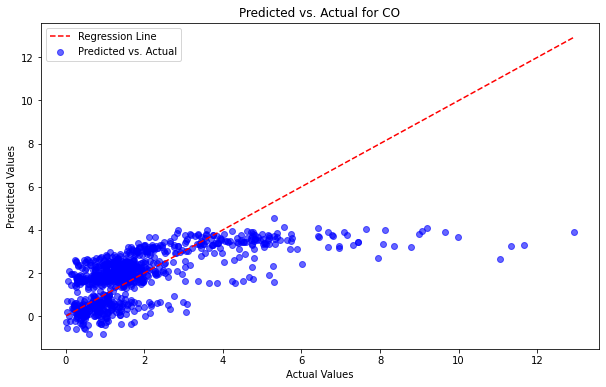

Set B (NOx):
R2 score (training): 0.4329
R2 score (testing): 0.4122
Coefficients: [-0.91392638 -0.08287263  0.22242073]
Intercept: 53.13801065217157
Mean Squared Error (training): 64.8994
Mean Squared Error (testing): 66.4527



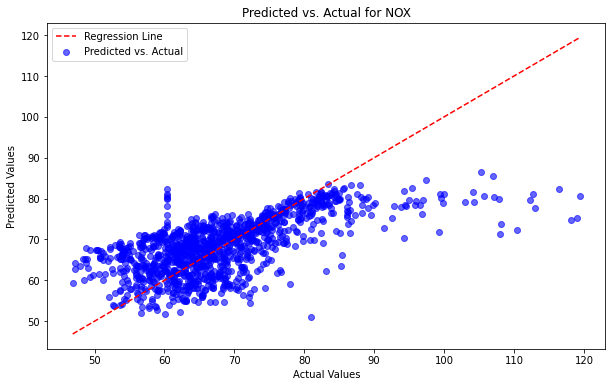

Set C (CO):
R2 score (training): 0.2233
R2 score (testing): 0.3219
Coefficients: [ 0.013846    0.25572814 -1.13596854]
Intercept: 13.57927865660065
Mean Squared Error (training): 4.7776
Mean Squared Error (testing): 3.4915



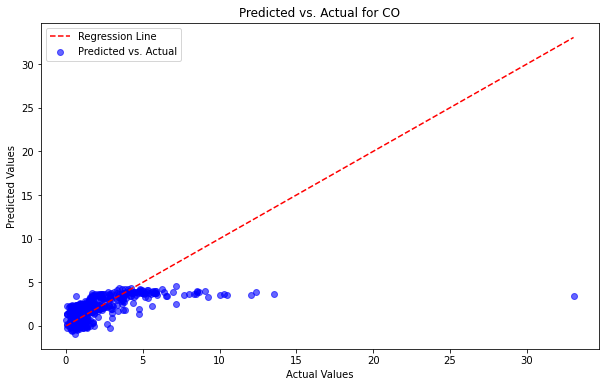

Set D (NOx):
R2 score (training): 0.4011
R2 score (testing): 0.3983
Coefficients: [-0.8903231   0.02997078 -0.16387342]
Intercept: 75.84304878351921
Mean Squared Error (training): 70.2244
Mean Squared Error (testing): 58.5962



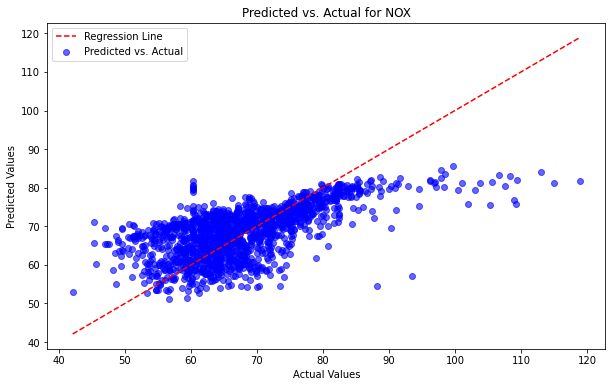

Set E (CO):
R2 score (training): 0.5424
R2 score (testing): 0.4916
Coefficients: [-1.51161268 -0.19558565 -0.21500844]
Intercept: 142.51045525616715
Mean Squared Error (training): 2.2371
Mean Squared Error (testing): 3.2393



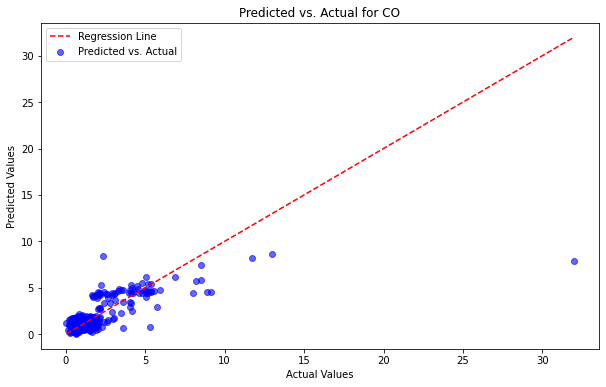

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from the CSV file
file_path = 'data-power.csv'  # Replace 'boom.csv' with the actual file path if it's in a different location
data = pd.read_csv('data-power.csv')

# Split the data into sets based on the last digit of student numbers
set_a = data[(data.index % 10).isin([0, 9])]
set_b = data[(data.index % 10).isin([1, 8])]
set_c = data[(data.index % 10).isin([2, 7])]
set_d = data[(data.index % 10).isin([3, 6])]
set_e = data[(data.index % 10).isin([4, 5])]

def perform_regression(data_set, target_variable, feature_variables, test_size_ratio):
    # Split the data into features (X) and target variable (y)
    X = data_set[feature_variables].values
    y = data_set[target_variable].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # R2 score for training and testing data
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # mean squared error for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # coefficients and intercept
    coef = model.coef_
    intercept = model.intercept_

    # results
    print(f"R2 score (training): {r2_train:.4f}")
    print(f"R2 score (testing): {r2_test:.4f}")
    print(f"Coefficients: {coef}")
    print(f"Intercept: {intercept}")
    print(f"Mean Squared Error (training): {mse_train:.4f}")
    print(f"Mean Squared Error (testing): {mse_test:.4f}\n")

    # Plot the values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6, label='Predicted vs. Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Regression Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs. Actual for {target_variable}')
    plt.legend()
    plt.show()

# Set A
print("Set A (CO):")
perform_regression(set_a, 'CO', ['AP', 'AFDP', 'GTEP'], test_size_ratio=0.3)

# Set B
print("Set B (NOx):")
perform_regression(set_b, 'NOX', ['AT', 'TIT', 'TAT'], test_size_ratio=0.4)

# Set C
print("Set C (CO):")
perform_regression(set_c, 'CO', ['AH', 'AFDP', 'CDP'], test_size_ratio=0.2)

# Set D
print("Set D (NOx):")
perform_regression(set_d, 'NOX', ['AT', 'AP', 'TEY'], test_size_ratio=0.5)

# Set E
print("Set E (CO):")
perform_regression(set_e, 'CO', ['CDP', 'GTEP', 'TAT'], test_size_ratio=0.1)


I noticed that r2 values are all below 0.5(except for one) so I tried to use Linear Regression

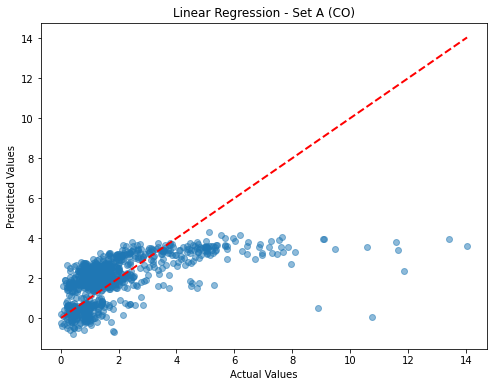

Results for Set A (CO):
R2 (Training): 0.28202673353839425
R2 (Testing): 0.3512619587480048
Coefficient: [ 0.03236033  0.3183683  -0.30596787]
Intercept: -24.393571351197103
MSE (Training): 3.0334891488153546
MSE (Testing): 2.1225942703164966



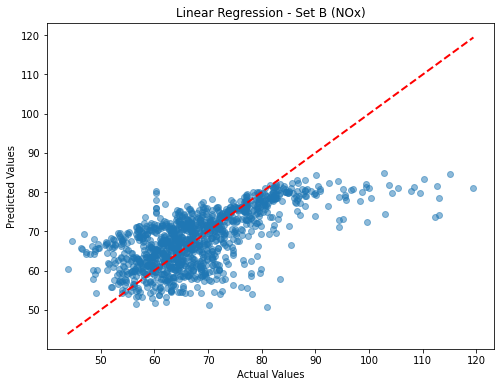

Results for Set B (NOx):
R2 (Training): 0.4303328408738383
R2 (Testing): 0.4144236577368672
Coefficient: [-0.91486419 -0.09858396  0.19275601]
Intercept: 86.27604994264549
MSE (Training): 65.47913559155991
MSE (Testing): 65.73319726451804



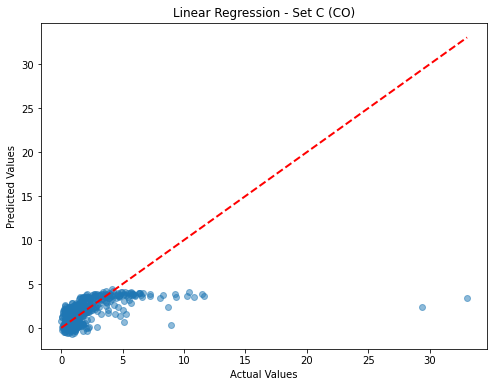

Results for Set C (CO):
R2 (Training): 0.24334839846431044
R2 (Testing): 0.22584403215512028
Coefficient: [ 0.01598562  0.20432569 -1.13094972]
Intercept: 13.545131939208755
MSE (Training): 4.515801081512846
MSE (Testing): 4.54925821909299



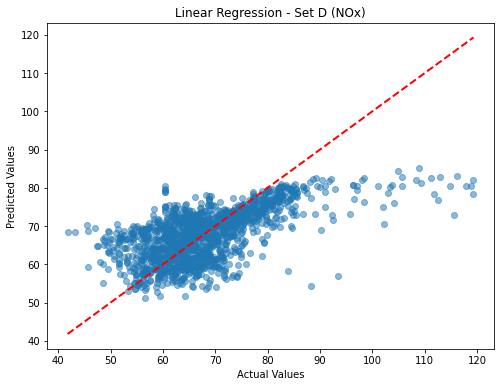

Results for Set D (NOx):
R2 (Training): 0.4137190759609325
R2 (Testing): 0.38848961039800334
Coefficient: [-0.86849191  0.05802687 -0.14164828]
Intercept: 43.68287955035213
MSE (Training): 62.02525459740549
MSE (Testing): 66.648065595328



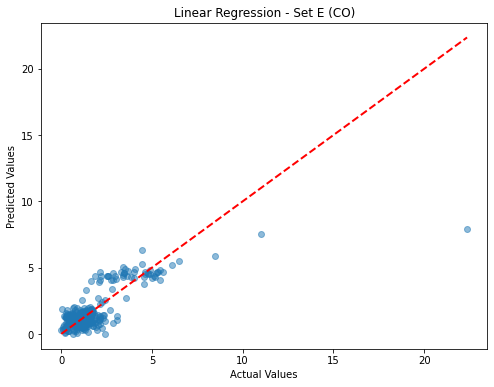

Results for Set E (CO):
R2 (Training): 0.5312969880733485
R2 (Testing): 0.5912973372345436
Coefficient: [-1.45508698 -0.21627948 -0.21918033]
Intercept: 144.6250356178569
MSE (Training): 2.4409246790227273
MSE (Testing): 1.4053205917898828



In [4]:
#Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[data.index % 10 == 0]  # For student numbers ending in 0
set_a_data = set_a_data.append(data[data.index % 10 == 9])  # For student numbers ending in 9

set_b_data = data[data.index % 10 == 1]  # For student numbers ending in 1
set_b_data = set_b_data.append(data[data.index % 10 == 8])  # For student numbers ending in 8

set_c_data = data[data.index % 10 == 2]  # For student numbers ending in 2
set_c_data = set_c_data.append(data[data.index % 10 == 7])  # For student numbers ending in 7

set_d_data = data[data.index % 10 == 3]  # For student numbers ending in 3
set_d_data = set_d_data.append(data[data.index % 10 == 6])  # For student numbers ending in 6

set_e_data = data[data.index % 10 == 4]  # For student numbers ending in 4
set_e_data = set_e_data.append(data[data.index % 10 == 5])  # For student numbers ending in 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Split data into training and testing sets
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.4, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.5, random_state=42)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.1, random_state=42)

# Perform linear regression for each set and evaluate the model
def evaluate_linear_regression(X_train, X_test, y_train, y_test, target_name):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Linear Regression - Set {target_name}')
    plt.show()
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    coef = model.coef_
    intercept = model.intercept_
    
    print(f"Results for Set {target_name}:")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("Coefficient:", coef)
    print("Intercept:", intercept)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()

# Evaluate models for each set
evaluate_linear_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)')
evaluate_linear_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)')
evaluate_linear_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)')
evaluate_linear_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)')
evaluate_linear_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)')


Still, most of the values are below 0.5, then i tried Lasso Regression with alpha values 0.001, 0.1, 1.0

Results for Set A (CO) with Alpha = 0.001:
R2 (Training): 0.28202553516213136
R2 (Testing): 0.35126039244770824
Coefficient: [ 0.03232519  0.31403445 -0.30531442]
Intercept: -24.356356392355757
MSE (Training): 3.0334942120420227
MSE (Testing): 2.1225993950661235



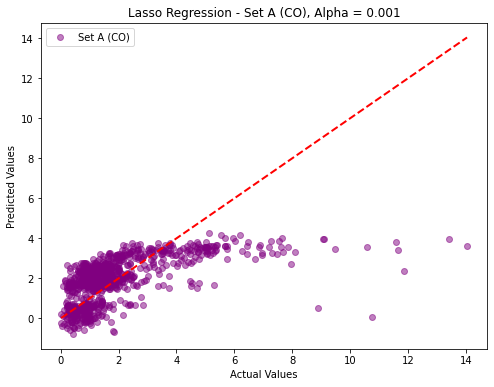

Results for Set B (NOx) with Alpha = 0.001:
R2 (Training): 0.4303328403999912
R2 (Testing): 0.41442293203534175
Coefficient: [-0.91483571 -0.09858589  0.1927285 ]
Intercept: 86.29263996503667
MSE (Training): 65.47913564602523
MSE (Testing): 65.7332787273062



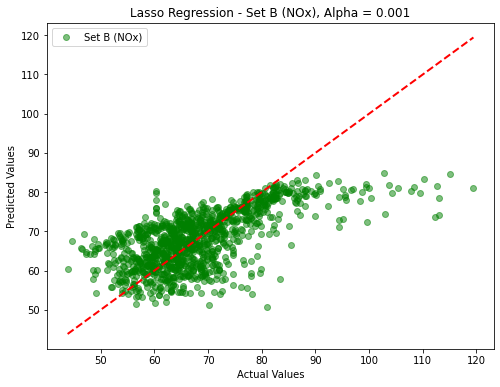

Results for Set C (CO) with Alpha = 0.001:
R2 (Training): 0.2433469074617597
R2 (Testing): 0.2257052501017942
Coefficient: [ 0.01599911  0.19898144 -1.12743779]
Intercept: 13.524054573364964
MSE (Training): 4.515809980021642
MSE (Testing): 4.550073759401378



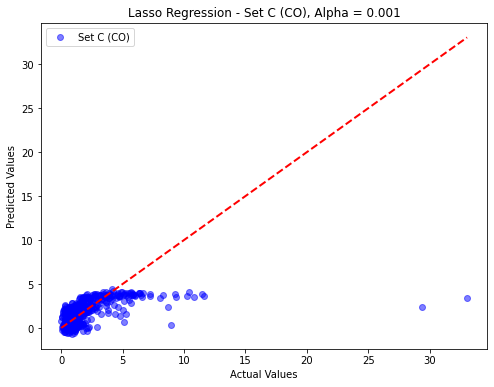

Results for Set D (NOx) with Alpha = 0.001:
R2 (Training): 0.413719075637354
R2 (Testing): 0.3884899950741485
Coefficient: [-0.86848203  0.05800672 -0.14164188]
Intercept: 43.70226360621889
MSE (Training): 62.0252546316383
MSE (Testing): 66.64802366975913



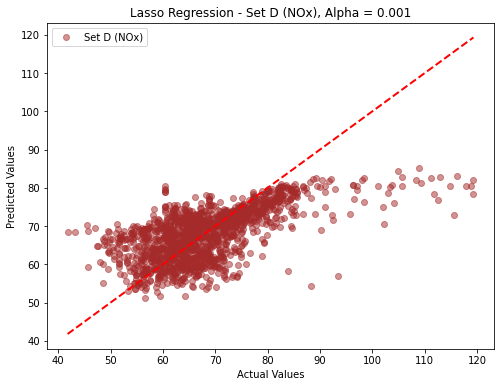

Results for Set E (CO) with Alpha = 0.001:
R2 (Training): 0.5312930233820898
R2 (Testing): 0.5910610585542462
Coefficient: [-1.41843359 -0.22587781 -0.21918599]
Intercept: 144.42853559920115
MSE (Training): 2.4409453264529586
MSE (Testing): 1.4061330340005014



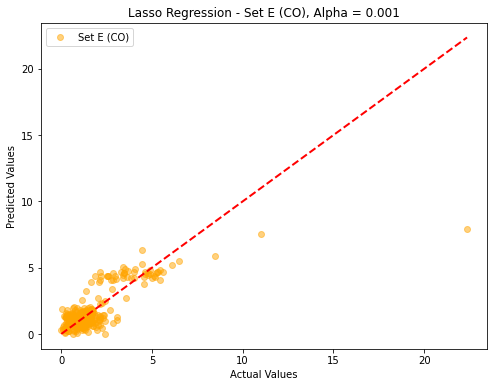

Results for Set A (CO) with Alpha = 0.1:
R2 (Training): 0.2754609147901711
R2 (Testing): 0.34351974633497184
Coefficient: [ 0.02905137  0.         -0.25628641]
Intercept: -20.965269273951087
MSE (Training): 3.061230209459551
MSE (Testing): 2.14792587515928



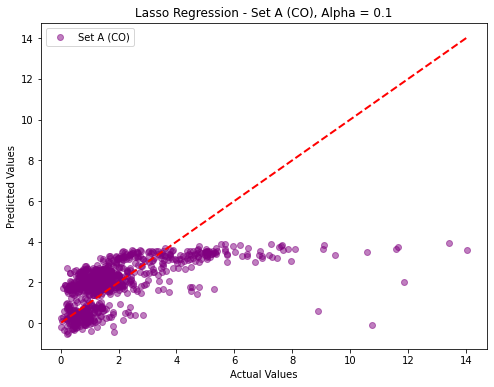

Results for Set B (NOx) with Alpha = 0.1:
R2 (Training): 0.4303281435406924
R2 (Testing): 0.4143463319730354
Coefficient: [-0.91203442 -0.09877027  0.19001552]
Intercept: 87.92292993283479
MSE (Training): 65.47967551616159
MSE (Testing): 65.74187737899797



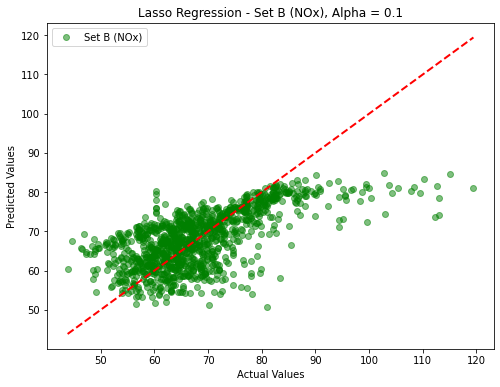

Results for Set C (CO) with Alpha = 0.1:
R2 (Training): 0.2399927484066282
R2 (Testing): 0.2177666914830635
Coefficient: [ 0.01692653  0.         -0.94547344]
Intercept: 12.087386122914321
MSE (Training): 4.535828063718268
MSE (Testing): 4.596723988223547



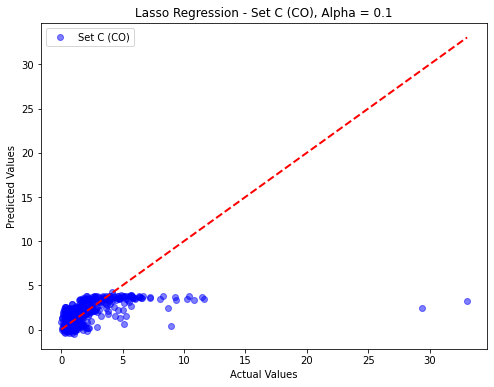

Results for Set D (NOx) with Alpha = 0.1:
R2 (Training): 0.4137153807566072
R2 (Testing): 0.38852821286596295
Coefficient: [-0.86717323  0.05610303 -0.14097879]
Intercept: 45.51933320509086
MSE (Training): 62.025645529430854
MSE (Testing): 66.64385834086355



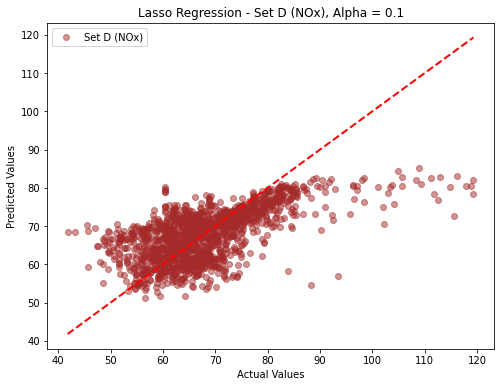

Results for Set E (CO) with Alpha = 0.1:
R2 (Training): 0.524586837493515
R2 (Testing): 0.5737601529832268
Coefficient: [-0.         -0.58581967 -0.21375302]
Intercept: 133.4498183039843
MSE (Training): 2.475869989237285
MSE (Testing): 1.4656220490488783



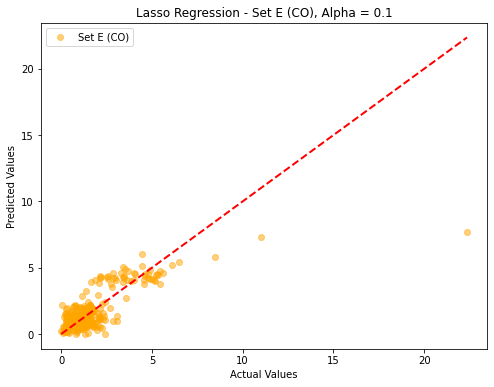

Results for Set A (CO) with Alpha = 1.0:
R2 (Training): 0.2541825092460629
R2 (Testing): 0.3295611772361692
Coefficient: [ 0.0042482  -0.         -0.19935978]
Intercept: 2.7182228608271393
MSE (Training): 3.1511330169000793
MSE (Testing): 2.193596665072811



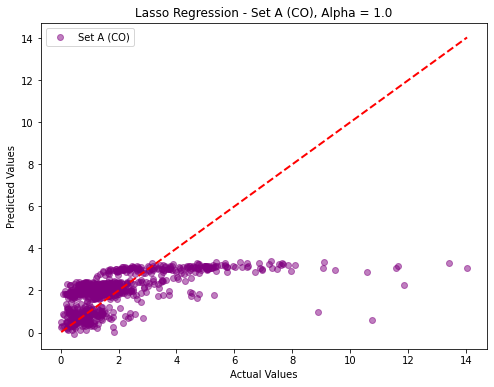

Results for Set B (NOx) with Alpha = 1.0:
R2 (Training): 0.4298650003524369
R2 (Testing): 0.41319101997157937
Coefficient: [-0.88665398 -0.10041861  0.16540038]
Intercept: 102.68871378087893
MSE (Training): 65.53291048878772
MSE (Testing): 65.87156559590966



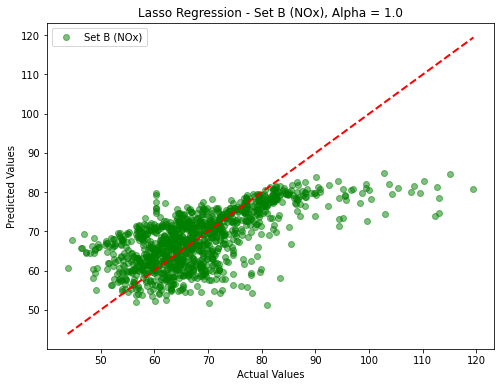

Results for Set C (CO) with Alpha = 1.0:
R2 (Training): 0.10361515306991265
R2 (Testing): 0.0802252172479847
Coefficient: [ 0.02314353 -0.         -0.1993294 ]
Intercept: 2.5866808317701797
MSE (Training): 5.349748355786286
MSE (Testing): 5.404974144677131



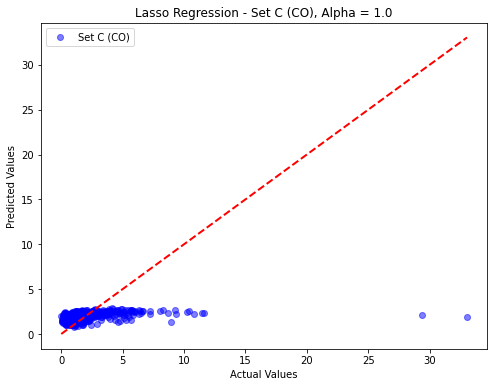

Results for Set D (NOx) with Alpha = 1.0:
R2 (Training): 0.41334909373019213
R2 (Testing): 0.3885705463241522
Coefficient: [-0.85527504  0.03879679 -0.13495072]
Intercept: 62.03814774029016
MSE (Training): 62.064396655618964
MSE (Testing): 66.63924444853032



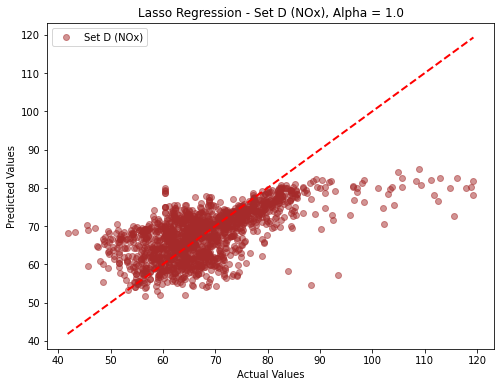

Results for Set E (CO) with Alpha = 1.0:
R2 (Training): 0.47050859915950705
R2 (Testing): 0.5271806535299366
Coefficient: [-0.         -0.41425037 -0.12942652]
Intercept: 83.10287922316384
MSE (Training): 2.757500154157603
MSE (Testing): 1.625785257416668



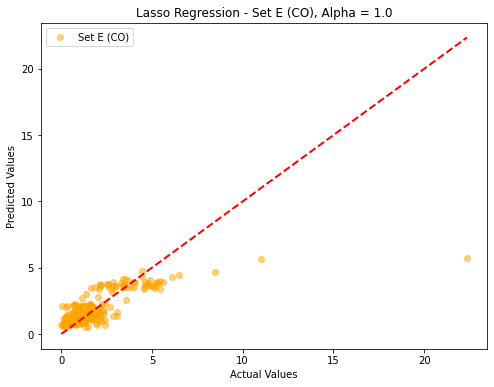

In [5]:
#Lasso Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[data.index % 10 == 0]  # For student numbers ending in 0
set_a_data = set_a_data.append(data[data.index % 10 == 9])  # For student numbers ending in 9

set_b_data = data[data.index % 10 == 1]  # For student numbers ending in 1
set_b_data = set_b_data.append(data[data.index % 10 == 8])  # For student numbers ending in 8

set_c_data = data[data.index % 10 == 2]  # For student numbers ending in 2
set_c_data = set_c_data.append(data[data.index % 10 == 7])  # For student numbers ending in 7

set_d_data = data[data.index % 10 == 3]  # For student numbers ending in 3
set_d_data = set_d_data.append(data[data.index % 10 == 6])  # For student numbers ending in 6

set_e_data = data[data.index % 10 == 4]  # For student numbers ending in 4
set_e_data = set_e_data.append(data[data.index % 10 == 5])  # For student numbers ending in 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Step 3: Split data into training and testing sets
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.4, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.5, random_state=42)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.1, random_state=42)

# Perform Lasso regression for each set with different alpha values and plot the results
alphas = [0.001, 0.1, 1.0]

def plot_lasso_regression(X_train, X_test, y_train, y_test, alpha, target_name, color):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    coef = model.coef_
    intercept = model.intercept_
    
    print(f"Results for Set {target_name} with Alpha = {alpha}:")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("Coefficient:", coef)
    print("Intercept:", intercept)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5, c=color, label=f'Set {target_name}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Lasso Regression - Set {target_name}, Alpha = {alpha}')
    plt.legend()
    plt.show()

# Evaluate models for each set and alpha value
for alpha in alphas:
    plot_lasso_regression(X_a_train, X_a_test, y_a_train, y_a_test, alpha, 'A (CO)', 'purple')
    plot_lasso_regression(X_b_train, X_b_test, y_b_train, y_b_test, alpha, 'B (NOx)', 'green')
    plot_lasso_regression(X_c_train, X_c_test, y_c_train, y_c_test, alpha, 'C (CO)', 'blue')
    plot_lasso_regression(X_d_train, X_d_test, y_d_train, y_d_test, alpha, 'D (NOx)', 'brown')
    plot_lasso_regression(X_e_train, X_e_test, y_e_train, y_e_test, alpha, 'E (CO)', 'orange')


Still, most values were below 0.5, so then i tried Ridge Regression

Results for Set A (CO) - Linear Regression:
R2 (Training): 0.2710410843239741
R2 (Testing): 0.39513752206348807
Coefficient: [ 0.02721668  0.38669016 -0.31491743]
Intercept: -19.242936635697617
MSE (Training): 3.165345819749179
MSE (Testing): 1.813832362301083



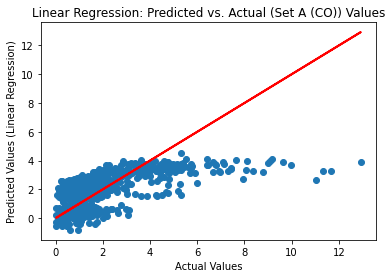

Results for Set B (NOx) - Linear Regression:
R2 (Training): 0.4329310518303966
R2 (Testing): 0.4122422608203
Coefficient: [-0.91392638 -0.08287263  0.22242073]
Intercept: 53.13801065217173
MSE (Training): 64.89942362465213
MSE (Testing): 66.45273705385786



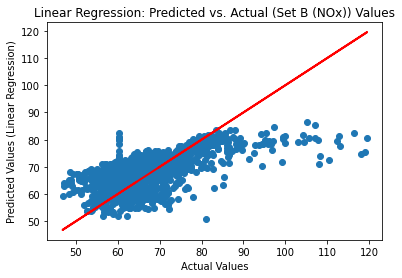

Results for Set C (CO) - Linear Regression:
R2 (Training): 0.22326587954143218
R2 (Testing): 0.3219307374389526
Coefficient: [ 0.013846    0.25572814 -1.13596854]
Intercept: 13.57927865660065
MSE (Training): 4.777585340262465
MSE (Testing): 3.4914629445782284



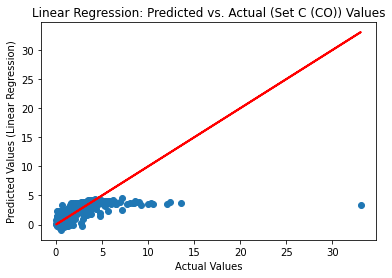

Results for Set D (NOx) - Linear Regression:
R2 (Training): 0.40110040415961556
R2 (Testing): 0.3983356985467075
Coefficient: [-0.8903231   0.02997078 -0.16387342]
Intercept: 75.84304878351931
MSE (Training): 70.22444614717269
MSE (Testing): 58.59615044064412



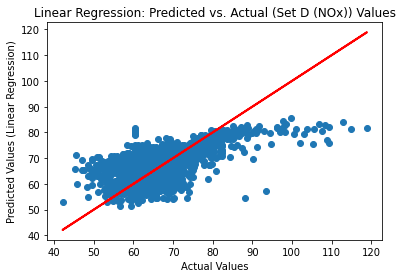

Results for Set E (CO) - Linear Regression:
R2 (Training): 0.5424074929749629
R2 (Testing): 0.4916440906282774
Coefficient: [-1.51161268 -0.19558565 -0.21500844]
Intercept: 142.5104552561669
MSE (Training): 2.2370825398765652
MSE (Testing): 3.239321721206613



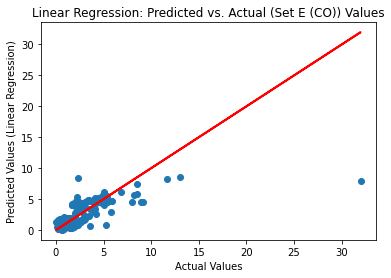

Results for Set A (CO) - Ridge Regression:
R2 (Training): 0.27104104670263707
R2 (Testing): 0.3951664530316338
Coefficient: [ 0.0272143   0.38589513 -0.31480037]
Intercept: -19.24015814534937
MSE (Training): 3.1653459831116666
MSE (Testing): 1.8137456055122105



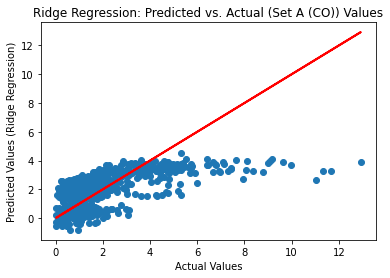

Results for Set B (NOx) - Ridge Regression:
R2 (Training): 0.43293105177352864
R2 (Testing): 0.4122423075719903
Coefficient: [-0.91391505 -0.08287407  0.22241395]
Intercept: 53.14306464593297
MSE (Training): 64.8994236311605
MSE (Testing): 66.45273176804439



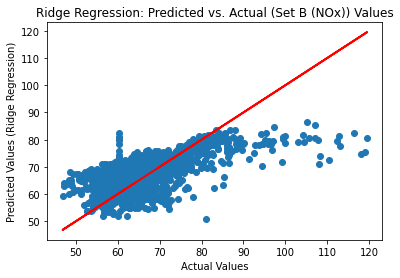

Results for Set C (CO) - Ridge Regression:
R2 (Training): 0.2232657772689831
R2 (Testing): 0.3219064877207022
Coefficient: [ 0.0138538   0.25445334 -1.13492066]
Intercept: 13.571344274800339
MSE (Training): 4.777585969326311
MSE (Testing): 3.4915878093927284



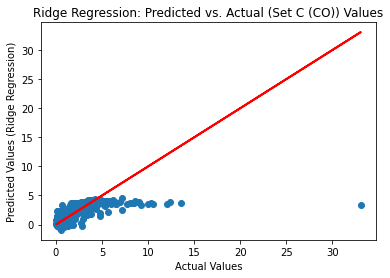

Results for Set D (NOx) - Ridge Regression:
R2 (Training): 0.4011004040968661
R2 (Testing): 0.3983363168305126
Coefficient: [-0.89031076  0.02997599 -0.16387202]
Intercept: 75.837362694055
MSE (Training): 70.22444615453043
MSE (Testing): 58.59609022591844



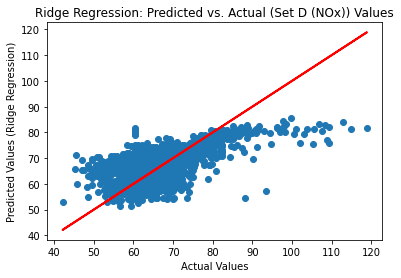

Results for Set E (CO) - Ridge Regression:
R2 (Training): 0.5424037539123043
R2 (Testing): 0.49160568173276786
Coefficient: [-1.47680918 -0.20484871 -0.21509127]
Intercept: 142.36992789584087
MSE (Training): 2.237100819441157
MSE (Testing): 3.2395664685720273



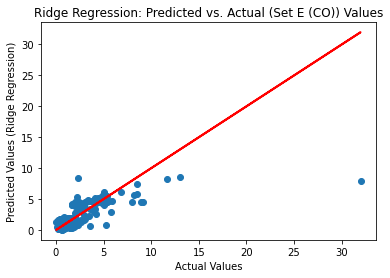

Results for Set A (CO) - Lasso Regression:
R2 (Training): 0.24183683003355372
R2 (Testing): 0.36824929110531524
Coefficient: [ 0.         -0.         -0.19850473]
Intercept: 7.001767645006784
MSE (Training): 3.292158953177069
MSE (Testing): 1.8944634896332682



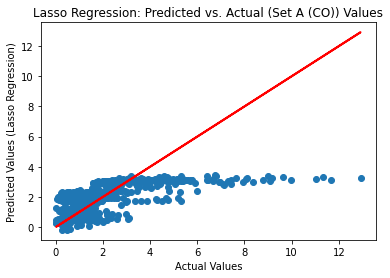

Results for Set B (NOx) - Lasso Regression:
R2 (Training): 0.43248064108257656
R2 (Testing): 0.4116200788020835
Coefficient: [-0.88729422 -0.08452899  0.19588961]
Intercept: 68.93294630633746
MSE (Training): 64.95097184999972
MSE (Testing): 66.52308184951106



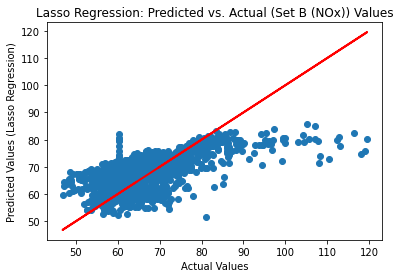

Results for Set C (CO) - Lasso Regression:
R2 (Training): 0.08611478189895616
R2 (Testing): 0.10671093534152121
Coefficient: [ 0.02107917 -0.         -0.17303163]
Intercept: 2.437444055252576
MSE (Training): 5.621182983572833
MSE (Testing): 4.5996564661729185



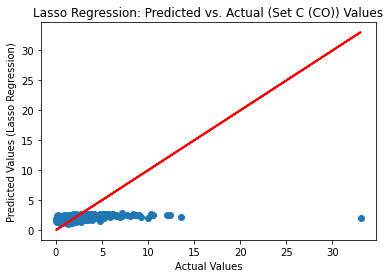

Results for Set D (NOx) - Lasso Regression:
R2 (Training): 0.400750287845983
R2 (Testing): 0.3990642811631697
Coefficient: [-0.87787182  0.0080806  -0.15715779]
Intercept: 96.89964498111897
MSE (Training): 70.26549931264934
MSE (Testing): 58.52519370197848



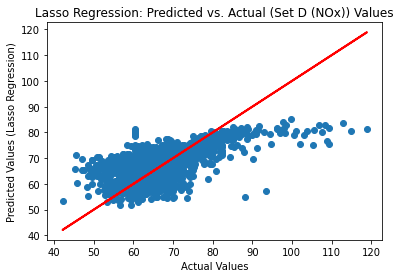

Results for Set E (CO) - Lasso Regression:
R2 (Training): 0.47556398034197045
R2 (Testing): 0.4139009186958874
Coefficient: [-0.         -0.40263524 -0.122599  ]
Intercept: 79.07662920896044
MSE (Training): 2.5638677313288025
MSE (Testing): 3.734713120959071



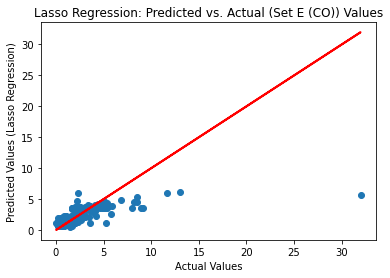

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[(data.index % 10 == 0) | (data.index % 10 == 9)]  # For student numbers ending in 0 and 9
set_b_data = data[(data.index % 10 == 1) | (data.index % 10 == 8)]  # For student numbers ending in 1 and 8
set_c_data = data[(data.index % 10 == 2) | (data.index % 10 == 7)]  # For student numbers ending in 2 and 7
set_d_data = data[(data.index % 10 == 3) | (data.index % 10 == 6)]  # For student numbers ending in 3 and 6
set_e_data = data[(data.index % 10 == 4) | (data.index % 10 == 5)]  # For student numbers ending in 4 and 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Split data into training and testing sets for each set
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.4, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.5, random_state=42)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.1, random_state=42)

# Function to evaluate regression models and plot results
def evaluate_and_plot_regression(X_train, X_test, y_train, y_test, target_name, model_type='linear'):
    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'ridge':
        model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) here for Ridge regression
    elif model_type == 'lasso':
        model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) here for Lasso regression
    else:
        raise ValueError("Invalid model_type. Use 'linear', 'ridge', or 'lasso'.")
        
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    coef = model.coef_
    intercept = model.intercept_
    
    print(f"Results for Set {target_name} - {model_type.capitalize()} Regression:")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("Coefficient:", coef)
    print("Intercept:", intercept)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()
    
    # Plot the predicted vs. actual values for the test data
    plt.scatter(y_test, y_test_pred)
    plt.plot(y_test, y_test, color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel(f'Predicted Values ({model_type.capitalize()} Regression)')
    plt.title(f'{model_type.capitalize()} Regression: Predicted vs. Actual (Set {target_name}) Values')
    plt.show()

# Evaluate models and plot results for each set using Linear Regression
evaluate_and_plot_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)', model_type='linear')
evaluate_and_plot_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)', model_type='linear')
evaluate_and_plot_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)', model_type='linear')
evaluate_and_plot_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)', model_type='linear')
evaluate_and_plot_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)', model_type='linear')

# Evaluate models and plot results for each set using Ridge Regression
evaluate_and_plot_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)', model_type='ridge')
evaluate_and_plot_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)', model_type='ridge')
evaluate_and_plot_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)', model_type='ridge')
evaluate_and_plot_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)', model_type='ridge')
evaluate_and_plot_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)', model_type='ridge')

# Evaluate models and plot results for each set using Lasso Regression
evaluate_and_plot_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)', model_type='lasso')
evaluate_and_plot_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)', model_type='lasso')
evaluate_and_plot_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)', model_type='lasso')
evaluate_and_plot_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)', model_type='lasso')
evaluate_and_plot_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)', model_type='lasso')


The tables and results above show Linear, Lasso alpha=0.1, and Ridge Regression models. I combined the three of them to avoid scrolling up and getting confused with the other Regressions i made earlier.

But as the results show, the values are still mostly below 0.5 or farther away from 1.0, so i tried different ways to make it closer to 1.0

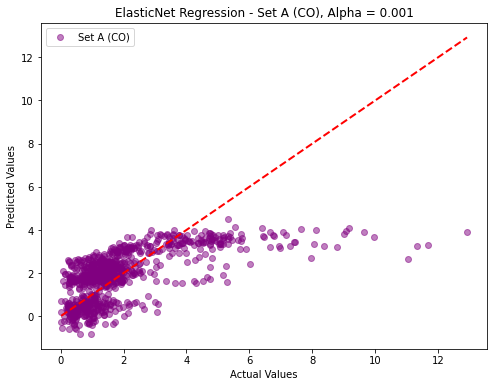

Results for Set A (CO) with Alpha = 0.001:
R2 (Training): 0.27103954126341445
R2 (Testing): 0.39531317482163486
Coefficient: [ 0.17251235  0.28626125 -1.27847287]
Intercept: 1.9569692557034195
MSE (Training): 3.1653525201546295
MSE (Testing): 1.8133056233002758



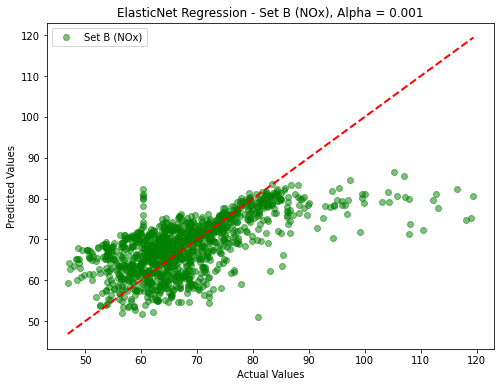

Results for Set B (NOx) with Alpha = 0.001:
R2 (Training): 0.43293083617584904
R2 (Testing): 0.41224110976717043
Coefficient: [-7.00727371 -1.37376209  1.72843019]
Intercept: 68.42723392461197
MSE (Training): 64.89944830569996
MSE (Testing): 66.45286719358357



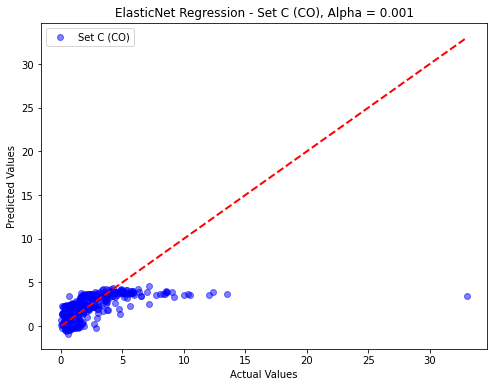

Results for Set C (CO) with Alpha = 0.001:
R2 (Training): 0.22326494572162237
R2 (Testing): 0.32187978958293517
Coefficient: [ 0.19082702  0.19253118 -1.25325881]
Intercept: 2.013698613886119
MSE (Training): 4.777591084060395
MSE (Testing): 3.4917252814237574



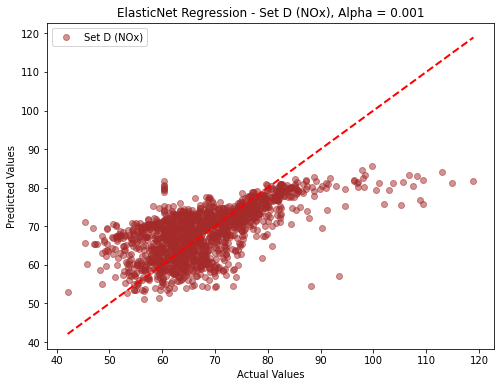

Results for Set D (NOx) with Alpha = 0.001:
R2 (Training): 0.4011002086767801
R2 (Testing): 0.398376032735283
Coefficient: [-6.85428368  0.18864029 -2.58481447]
Intercept: 68.3868630319149
MSE (Training): 70.22446906866729
MSE (Testing): 58.59222228972014



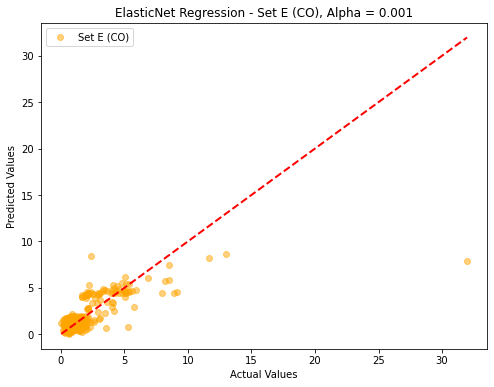

Results for Set E (CO) with Alpha = 0.001:
R2 (Training): 0.5424044909258345
R2 (Testing): 0.4914888400242281
Coefficient: [-1.65404064 -0.83021461 -1.68202516]
Intercept: 1.9695647005171761
MSE (Training): 2.237097216322499
MSE (Testing): 3.240311001835905



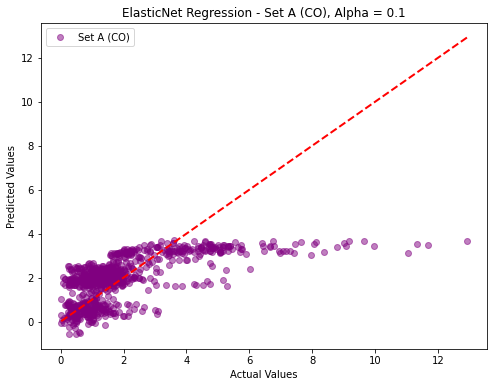

Results for Set A (CO) with Alpha = 0.1:
R2 (Training): 0.2600112157425686
R2 (Testing): 0.39302076781151984
Coefficient: [ 0.10444634  0.0166903  -0.97631747]
Intercept: 1.9569692557034204
MSE (Training): 3.2132406292586513
MSE (Testing): 1.8201799826367941



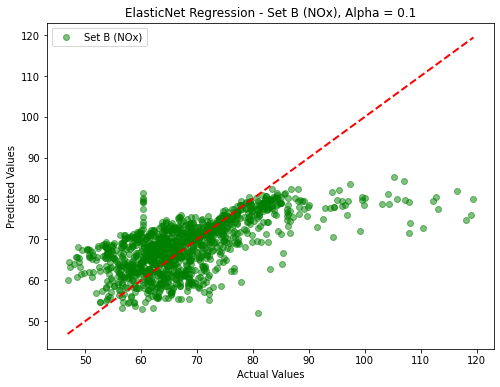

Results for Set B (NOx) with Alpha = 0.1:
R2 (Training): 0.4310650348769405
R2 (Testing): 0.4103532040956476
Coefficient: [-6.53188898 -1.40118232  1.43729687]
Intercept: 68.42723392461197
MSE (Training): 65.11298394239485
MSE (Testing): 66.66631652960982



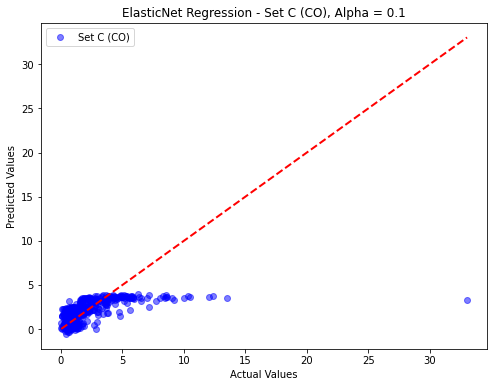

Results for Set C (CO) with Alpha = 0.1:
R2 (Training): 0.21846036846415617
R2 (Testing): 0.3119135748075538
Coefficient: [ 0.15597143  0.         -1.01890652]
Intercept: 2.013698613886119
MSE (Training): 4.807143381644384
MSE (Testing): 3.5430425605089737



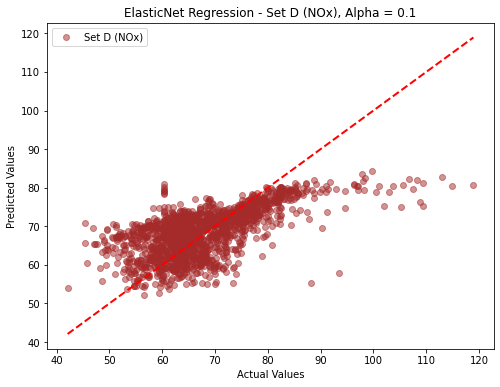

Results for Set D (NOx) with Alpha = 0.1:
R2 (Training): 0.3993375509478092
R2 (Testing): 0.4001703932489248
Coefficient: [-6.39918216  0.27379563 -2.33535923]
Intercept: 68.3868630319149
MSE (Training): 70.43115089584454
MSE (Testing): 58.41746932806339



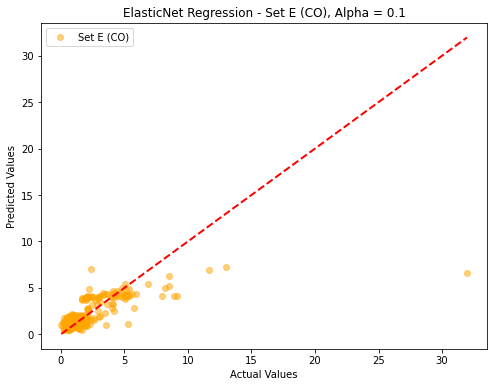

Results for Set E (CO) with Alpha = 0.1:
R2 (Training): 0.5225221971399552
R2 (Testing): 0.46229407296850655
Coefficient: [-1.12195289 -0.92787878 -1.24449161]
Intercept: 1.9695647005171761
MSE (Training): 2.3342979606490517
MSE (Testing): 3.4263445293816877



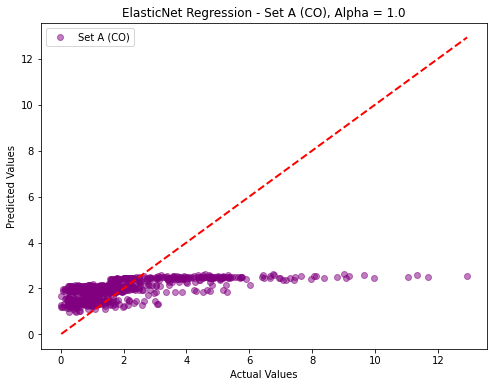

Results for Set A (CO) with Alpha = 1.0:
R2 (Training): 0.14779958801311155
R2 (Testing): 0.2261269838989176
Coefficient: [ 0.         -0.         -0.36918803]
Intercept: 1.956969255703422
MSE (Training): 3.700495259283021
MSE (Testing): 2.320652994882953



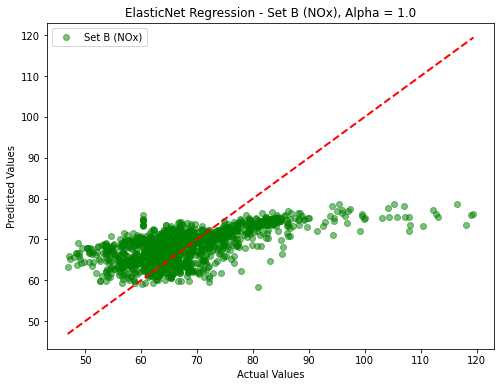

Results for Set B (NOx) with Alpha = 1.0:
R2 (Training): 0.3570012459122509
R2 (Testing): 0.3381412483054067
Coefficient: [-4.008624   -1.13864223  0.18524992]
Intercept: 68.42723392461197
MSE (Training): 73.58937333169463
MSE (Testing): 74.83070432137404



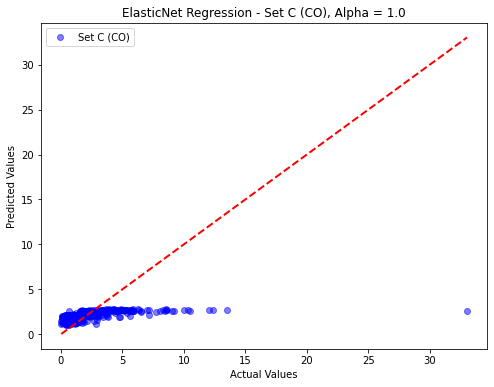

Results for Set C (CO) with Alpha = 1.0:
R2 (Training): 0.13093431581178738
R2 (Testing): 0.18146542597442772
Coefficient: [ 0.         -0.         -0.43204071]
Intercept: 2.013698613886118
MSE (Training): 5.345504160486084
MSE (Testing): 4.214736298873468



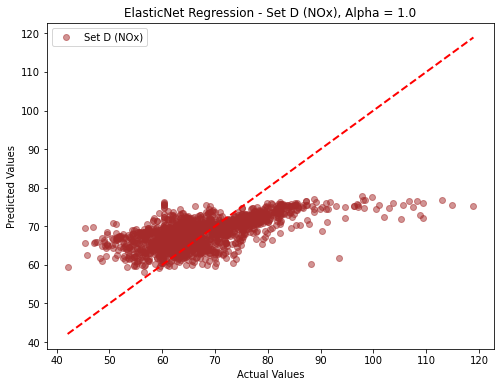

Results for Set D (NOx) with Alpha = 1.0:
R2 (Training): 0.32755807681996063
R2 (Testing): 0.33906589134453313
Coefficient: [-3.94530178  0.42541668 -0.99814634]
Intercept: 68.3868630319149
MSE (Training): 78.84770994910343
MSE (Testing): 64.36844328071747



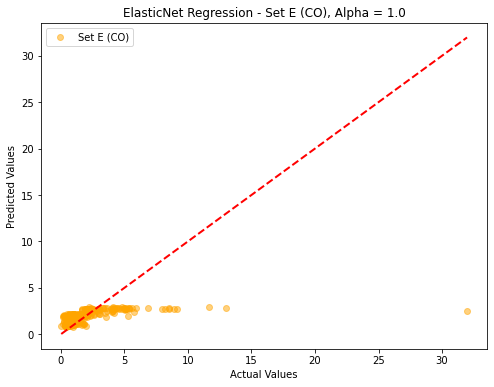

Results for Set E (CO) with Alpha = 1.0:
R2 (Training): 0.2105982713031027
R2 (Testing): 0.17109556090773959
Coefficient: [-0.30569279 -0.25386441 -0.        ]
Intercept: 1.9695647005171777
MSE (Training): 3.8592345746596375
MSE (Testing): 5.2819060521488685



In [7]:
#ElasticNet regression 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[data.index % 10 == 0]  # For student numbers ending in 0
set_a_data = set_a_data.append(data[data.index % 10 == 9])  # For student numbers ending in 9

set_b_data = data[data.index % 10 == 1]  # For student numbers ending in 1
set_b_data = set_b_data.append(data[data.index % 10 == 8])  # For student numbers ending in 8

set_c_data = data[data.index % 10 == 2]  # For student numbers ending in 2
set_c_data = set_c_data.append(data[data.index % 10 == 7])  # For student numbers ending in 7

set_d_data = data[data.index % 10 == 3]  # For student numbers ending in 3
set_d_data = set_d_data.append(data[data.index % 10 == 6])  # For student numbers ending in 6

set_e_data = data[data.index % 10 == 4]  # For student numbers ending in 4
set_e_data = set_e_data.append(data[data.index % 10 == 5])  # For student numbers ending in 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Split data into training and testing sets and apply feature scaling
scaler = StandardScaler()

X_a_train_scaled = scaler.fit_transform(X_a_train)
X_a_test_scaled = scaler.transform(X_a_test)

X_b_train_scaled = scaler.fit_transform(X_b_train)
X_b_test_scaled = scaler.transform(X_b_test)

X_c_train_scaled = scaler.fit_transform(X_c_train)
X_c_test_scaled = scaler.transform(X_c_test)

X_d_train_scaled = scaler.fit_transform(X_d_train)
X_d_test_scaled = scaler.transform(X_d_test)

X_e_train_scaled = scaler.fit_transform(X_e_train)
X_e_test_scaled = scaler.transform(X_e_test)

# Perform ElasticNet regression for each set with different alpha values and plot the results
alphas = [0.001, 0.1, 1.0]

def plot_elasticnet_regression(X_train, X_test, y_train, y_test, alpha, target_name, color):
    model = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio=0.5 means equal L1 and L2 regularization
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5, c=color, label=f'Set {target_name}')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'ElasticNet Regression - Set {target_name}, Alpha = {alpha}')
    plt.legend()
    plt.show()
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    coef = model.coef_
    intercept = model.intercept_
    
    print(f"Results for Set {target_name} with Alpha = {alpha}:")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("Coefficient:", coef)
    print("Intercept:", intercept)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()

# Evaluate models for each set and alpha value
for alpha in alphas:
    plot_elasticnet_regression(X_a_train_scaled, X_a_test_scaled, y_a_train, y_a_test, alpha, 'A (CO)', 'purple')
    plot_elasticnet_regression(X_b_train_scaled, X_b_test_scaled, y_b_train, y_b_test, alpha, 'B (NOx)', 'green')
    plot_elasticnet_regression(X_c_train_scaled, X_c_test_scaled, y_c_train, y_c_test, alpha, 'C (CO)', 'blue')
    plot_elasticnet_regression(X_d_train_scaled, X_d_test_scaled, y_d_train, y_d_test, alpha, 'D (NOx)', 'brown')
    plot_elasticnet_regression(X_e_train_scaled, X_e_test_scaled, y_e_train, y_e_test, alpha, 'E (CO)', 'orange')

I tried to use ElasticNet, but the values became lower, so i tried again the Lasso Regression

Results for Set A (CO) (alpha=0.001):
R2 (Training): 0.28202553516213136
R2 (Testing): 0.35126039244770824
Coefficient: [ 0.03232519  0.31403445 -0.30531442]
Intercept: -24.356356392355757
MSE (Training): 3.0334942120420227
MSE (Testing): 2.1225993950661235

Results for Set A (CO) (alpha=0.01):
R2 (Training): 0.28190866168821294
R2 (Testing): 0.3511155708058945
Coefficient: [ 0.03200998  0.27535565 -0.29947777]
Intercept: -24.022728585985654
MSE (Training): 3.0339880109499724
MSE (Testing): 2.1230732343781185

Results for Set A (CO) (alpha=0.1):
R2 (Training): 0.2754609147901711
R2 (Testing): 0.34351974633497184
Coefficient: [ 0.02905137  0.         -0.25628641]
Intercept: -20.965269273951087
MSE (Training): 3.061230209459551
MSE (Testing): 2.14792587515928

Results for Set A (CO) (alpha=1.0):
R2 (Training): 0.2541825092460629
R2 (Testing): 0.3295611772361692
Coefficient: [ 0.0042482  -0.         -0.19935978]
Intercept: 2.7182228608271393
MSE (Training): 3.1511330169000793
MSE (Testing

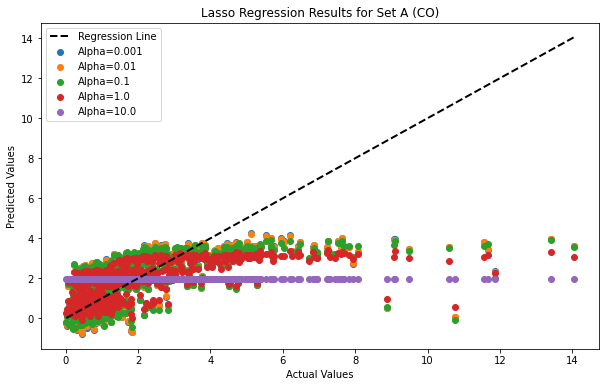

Results for Set B (NOx) (alpha=0.001):
R2 (Training): 0.4303328403999912
R2 (Testing): 0.41442293203534175
Coefficient: [-0.91483571 -0.09858589  0.1927285 ]
Intercept: 86.29263996503667
MSE (Training): 65.47913564602523
MSE (Testing): 65.7332787273062

Results for Set B (NOx) (alpha=0.01):
R2 (Training): 0.43033279337367025
R2 (Testing): 0.4144163445195438
Coefficient: [-0.9145788  -0.09860338  0.1924806 ]
Intercept: 86.44228843230741
MSE (Training): 65.47914105136199
MSE (Testing): 65.7340182012982

Results for Set B (NOx) (alpha=0.1):
R2 (Training): 0.4303281435406924
R2 (Testing): 0.4143463319730354
Coefficient: [-0.91203442 -0.09877027  0.19001552]
Intercept: 87.92292993283479
MSE (Training): 65.47967551616159
MSE (Testing): 65.74187737899797

Results for Set B (NOx) (alpha=1.0):
R2 (Training): 0.4298650003524369
R2 (Testing): 0.41319101997157937
Coefficient: [-0.88665398 -0.10041861  0.16540038]
Intercept: 102.68871378087893
MSE (Training): 65.53291048878772
MSE (Testing): 65.871

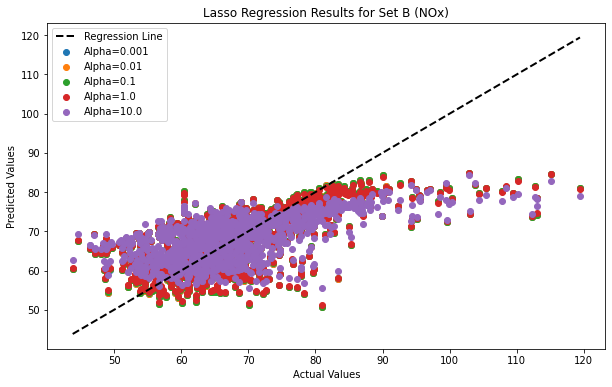

Results for Set C (CO) (alpha=0.001):
R2 (Training): 0.2433469074617597
R2 (Testing): 0.2257052501017942
Coefficient: [ 0.01599911  0.19898144 -1.12743779]
Intercept: 13.524054573364964
MSE (Training): 4.515809980021642
MSE (Testing): 4.550073759401378

Results for Set C (CO) (alpha=0.01):
R2 (Training): 0.2432006155208576
R2 (Testing): 0.22434856298155015
Coefficient: [ 0.01611983  0.15114374 -1.09596186]
Intercept: 13.334903918097089
MSE (Training): 4.516683070494986
MSE (Testing): 4.558046209771669

Results for Set C (CO) (alpha=0.1):
R2 (Training): 0.2399927484066282
R2 (Testing): 0.2177666914830635
Coefficient: [ 0.01692653  0.         -0.94547344]
Intercept: 12.087386122914321
MSE (Training): 4.535828063718268
MSE (Testing): 4.596723988223547

Results for Set C (CO) (alpha=1.0):
R2 (Training): 0.10361515306991265
R2 (Testing): 0.0802252172479847
Coefficient: [ 0.02314353 -0.         -0.1993294 ]
Intercept: 2.5866808317701797
MSE (Training): 5.349748355786286
MSE (Testing): 5.4049

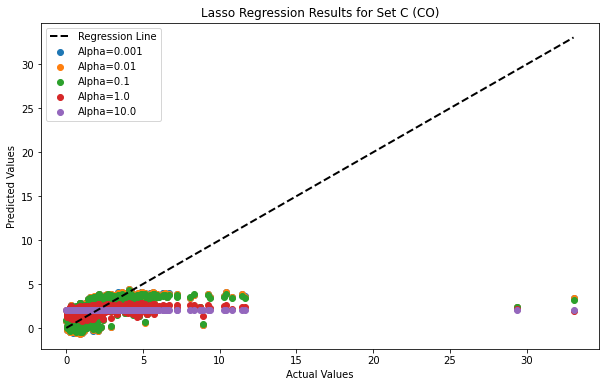

Results for Set D (NOx) (alpha=0.001):
R2 (Training): 0.413719075637354
R2 (Testing): 0.3884899950741485
Coefficient: [-0.86848203  0.05800672 -0.14164188]
Intercept: 43.70226360621889
MSE (Training): 62.0252546316383
MSE (Testing): 66.64802366975913

Results for Set D (NOx) (alpha=0.01):
R2 (Training): 0.41371903946631283
R2 (Testing): 0.38849374428463634
Coefficient: [-0.86836305  0.05783366 -0.1415816 ]
Intercept: 43.86745175157089
MSE (Training): 62.025258458332885
MSE (Testing): 66.64761504607787

Results for Set D (NOx) (alpha=0.1):
R2 (Training): 0.4137153807566072
R2 (Testing): 0.38852821286596295
Coefficient: [-0.86717323  0.05610303 -0.14097879]
Intercept: 45.51933320509086
MSE (Training): 62.025645529430854
MSE (Testing): 66.64385834086355

Results for Set D (NOx) (alpha=1.0):
R2 (Training): 0.41334909373019213
R2 (Testing): 0.3885705463241522
Coefficient: [-0.85527504  0.03879679 -0.13495072]
Intercept: 62.03814774029016
MSE (Training): 62.064396655618964
MSE (Testing): 66.

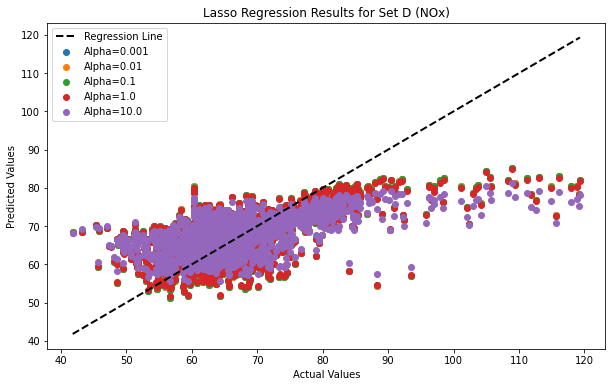

Results for Set E (CO) (alpha=0.001):
R2 (Training): 0.5312930233820898
R2 (Testing): 0.5910610585542462
Coefficient: [-1.41843359 -0.22587781 -0.21918599]
Intercept: 144.42853559920115
MSE (Training): 2.4409453264529586
MSE (Testing): 1.4061330340005014

Results for Set E (CO) (alpha=0.01):
R2 (Training): 0.5306383139119066
R2 (Testing): 0.5873066663005
Coefficient: [-0.98129573 -0.34092423 -0.21953428]
Intercept: 142.25276514749726
MSE (Training): 2.4443549407773704
MSE (Testing): 1.4190424794837915

Results for Set E (CO) (alpha=0.1):
R2 (Training): 0.524586837493515
R2 (Testing): 0.5737601529832268
Coefficient: [-0.         -0.58581967 -0.21375302]
Intercept: 133.4498183039843
MSE (Training): 2.475869989237285
MSE (Testing): 1.4656220490488783

Results for Set E (CO) (alpha=1.0):
R2 (Training): 0.47050859915950705
R2 (Testing): 0.5271806535299366
Coefficient: [-0.         -0.41425037 -0.12942652]
Intercept: 83.10287922316384
MSE (Training): 2.757500154157603
MSE (Testing): 1.625785

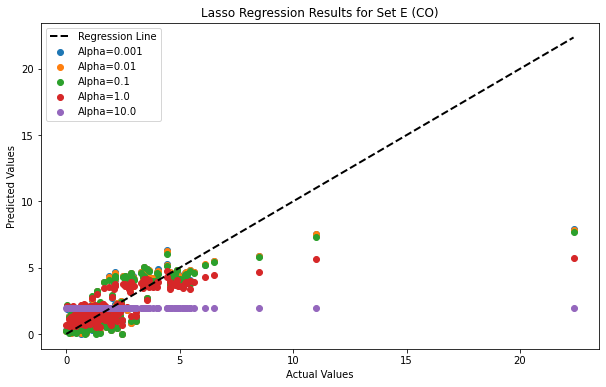

In [8]:
#Combined Lasso Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[data.index % 10 == 0]  # For student numbers ending in 0
set_a_data = set_a_data.append(data[data.index % 10 == 9])  # For student numbers ending in 9

set_b_data = data[data.index % 10 == 1]  # For student numbers ending in 1
set_b_data = set_b_data.append(data[data.index % 10 == 8])  # For student numbers ending in 8

set_c_data = data[data.index % 10 == 2]  # For student numbers ending in 2
set_c_data = set_c_data.append(data[data.index % 10 == 7])  # For student numbers ending in 7

set_d_data = data[data.index % 10 == 3]  # For student numbers ending in 3
set_d_data = set_d_data.append(data[data.index % 10 == 6])  # For student numbers ending in 6

set_e_data = data[data.index % 10 == 4]  # For student numbers ending in 4
set_e_data = set_e_data.append(data[data.index % 10 == 5])  # For student numbers ending in 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Split data into training and testing sets
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.4, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.5, random_state=42)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.1, random_state=42)

# Perform Lasso regression for each set and evaluate the model
def evaluate_lasso_regression(X_train, X_test, y_train, y_test, target_name, alpha):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    coef = model.coef_
    intercept = model.intercept_
    
    print(f"Results for Set {target_name} (alpha={alpha}):")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("Coefficient:", coef)
    print("Intercept:", intercept)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()
    return y_test_pred

# Evaluate models for each set and alpha
alpha_values = [0.001, 0.01, 0.1, 1.0, 10.0]

# Plot results for Set A (CO and variables AP, AFDP, GTEP)
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    y_a_pred = evaluate_lasso_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)', alpha)
    plt.scatter(y_a_test, y_a_pred, label=f'Alpha={alpha}')

plt.plot([min(y_a_test), max(y_a_test)], [min(y_a_test), max(y_a_test)], color='k', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results for Set A (CO)')
plt.legend()
plt.show()

# Plot results for Set B (NOx and variables AT, TIT, TAT)
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    y_b_pred = evaluate_lasso_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)', alpha)
    plt.scatter(y_b_test, y_b_pred, label=f'Alpha={alpha}')

plt.plot([min(y_b_test), max(y_b_test)], [min(y_b_test), max(y_b_test)], color='k', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results for Set B (NOx)')
plt.legend()
plt.show()

# Plot results for Set C (CO and variables AH, AFDP, CDP)
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    y_c_pred = evaluate_lasso_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)', alpha)
    plt.scatter(y_c_test, y_c_pred, label=f'Alpha={alpha}')

plt.plot([min(y_c_test), max(y_c_test)], [min(y_c_test), max(y_c_test)], color='k', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results for Set C (CO)')
plt.legend()
plt.show()

# Plot results for Set D (NOx and variables AT, AP, TEY)
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    y_d_pred = evaluate_lasso_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)', alpha)
    plt.scatter(y_d_test, y_d_pred, label=f'Alpha={alpha}')

plt.plot([min(y_d_test), max(y_d_test)], [min(y_d_test), max(y_d_test)], color='k', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results for Set D (NOx)')
plt.legend()
plt.show()

# Plot results for Set E (CO and variables CDP, GTEP, TAT)
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    y_e_pred = evaluate_lasso_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)', alpha)
    plt.scatter(y_e_test, y_e_pred, label=f'Alpha={alpha}')

plt.plot([min(y_e_test), max(y_e_test)], [min(y_e_test), max(y_e_test)], color='k', linestyle='--', linewidth=2, label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression Results for Set E (CO)')
plt.legend()
plt.show()


I tried combining Lasso Regressions of diferrent alpha values, but failed in doing so.

As a last ditch effort, I tried using Random Forest Regression Model, which if i am not mistaken is a non-linear regression model

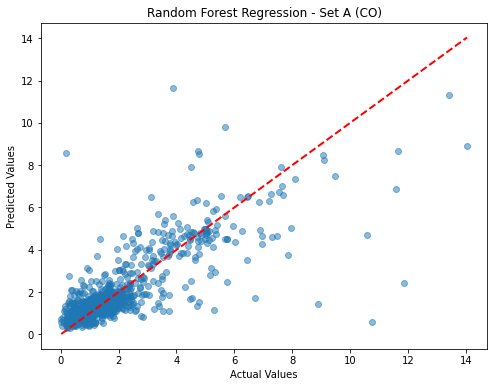

Results for Set A (CO):
R2 (Training): 0.9218010321919748
R2 (Testing): 0.6262144813073292
MSE (Training): 0.33039631331021285
MSE (Testing): 1.2229820819096335



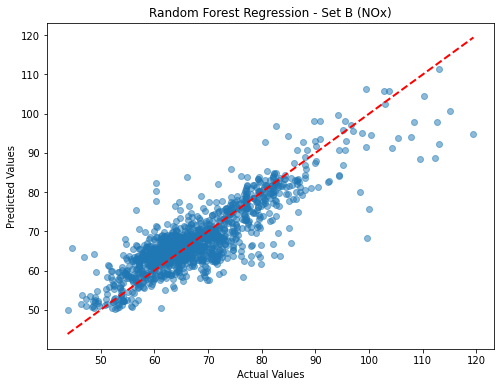

Results for Set B (NOx):
R2 (Training): 0.9658749025190597
R2 (Testing): 0.7407610347709908
MSE (Training): 3.922434090210256
MSE (Testing): 29.10057119826519



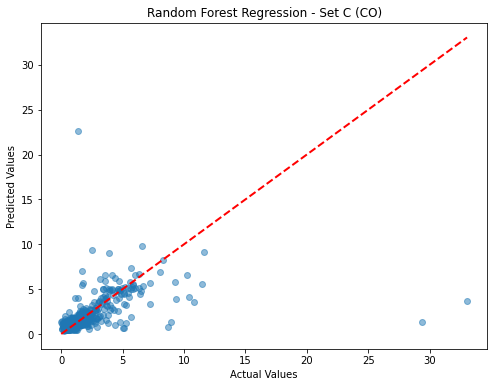

Results for Set C (CO):
R2 (Training): 0.9113084233054831
R2 (Testing): 0.1753271225346804
MSE (Training): 0.5293235580884286
MSE (Testing): 4.846116314669944



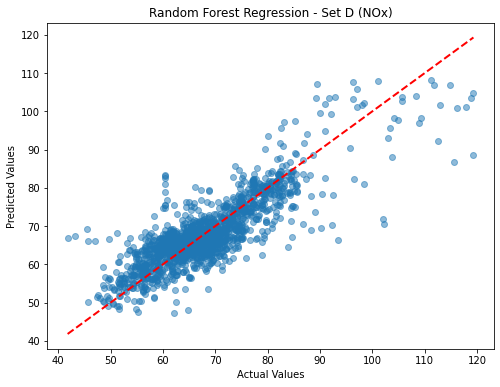

Results for Set D (NOx):
R2 (Training): 0.9650797843262106
R2 (Testing): 0.7026782626545132
MSE (Training): 3.6943642185069137
MSE (Testing): 32.40487649999887



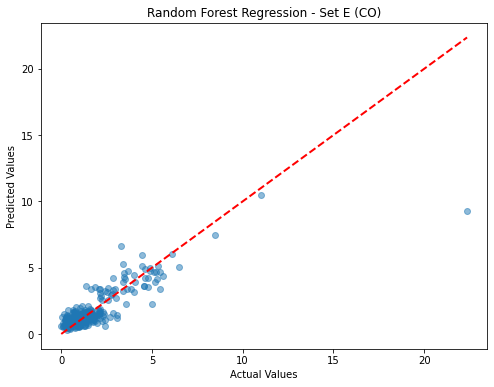

Results for Set E (CO):
R2 (Training): 0.9479239852116274
R2 (Testing): 0.6945349555387065
MSE (Training): 0.2712029290351211
MSE (Testing): 1.0503389289142413



In [9]:
#Random Forest Regression model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load the data from 'data-power.csv'
data = pd.read_csv('data-power.csv')

# Separate the data for each set based on the student numbers' ending
set_a_data = data[data.index % 10 == 0]  # For student numbers ending in 0
set_a_data = set_a_data.append(data[data.index % 10 == 9])  # For student numbers ending in 9

set_b_data = data[data.index % 10 == 1]  # For student numbers ending in 1
set_b_data = set_b_data.append(data[data.index % 10 == 8])  # For student numbers ending in 8

set_c_data = data[data.index % 10 == 2]  # For student numbers ending in 2
set_c_data = set_c_data.append(data[data.index % 10 == 7])  # For student numbers ending in 7

set_d_data = data[data.index % 10 == 3]  # For student numbers ending in 3
set_d_data = set_d_data.append(data[data.index % 10 == 6])  # For student numbers ending in 6

set_e_data = data[data.index % 10 == 4]  # For student numbers ending in 4
set_e_data = set_e_data.append(data[data.index % 10 == 5])  # For student numbers ending in 5

# Define the variables and target variable for each set
# Set A (CO and variables AP, AFDP, GTEP)
X_a = set_a_data[['AP', 'AFDP', 'GTEP']]
y_a = set_a_data['CO']

# Set B (NOx and variables AT, TIT, TAT)
X_b = set_b_data[['AT', 'TIT', 'TAT']]
y_b = set_b_data['NOX']

# Set C (CO and variables AH, AFDP, CDP)
X_c = set_c_data[['AH', 'AFDP', 'CDP']]
y_c = set_c_data['CO']

# Set D (NOx and variables AT, AP, TEY)
X_d = set_d_data[['AT', 'AP', 'TEY']]
y_d = set_d_data['NOX']

# Set E (CO and variables CDP, GTEP, TAT)
X_e = set_e_data[['CDP', 'GTEP', 'TAT']]
y_e = set_e_data['CO']

# Split data into training and testing sets
X_a_train, X_a_test, y_a_train, y_a_test = train_test_split(X_a, y_a, test_size=0.3, random_state=42)
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.4, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(X_d, y_d, test_size=0.5, random_state=42)
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.1, random_state=42)

# Perform linear regression for each set and evaluate the model
def evaluate_random_forest_regression(X_train, X_test, y_train, y_test, target_name):
    model = RandomForestRegressor(random_state=42)  # You can modify hyperparameters here if needed.
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Random Forest Regression - Set {target_name}')
    plt.show()
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"Results for Set {target_name}:")
    print("R2 (Training):", r2_train)
    print("R2 (Testing):", r2_test)
    print("MSE (Training):", mse_train)
    print("MSE (Testing):", mse_test)
    print()


# Evaluate models for each set
evaluate_random_forest_regression(X_a_train, X_a_test, y_a_train, y_a_test, 'A (CO)')
evaluate_random_forest_regression(X_b_train, X_b_test, y_b_train, y_b_test, 'B (NOx)')
evaluate_random_forest_regression(X_c_train, X_c_test, y_c_train, y_c_test, 'C (CO)')
evaluate_random_forest_regression(X_d_train, X_d_test, y_d_train, y_d_test, 'D (NOx)')
evaluate_random_forest_regression(X_e_train, X_e_test, y_e_train, y_e_test, 'E (CO)')


Luckily, the values of most R2 became closer to 1.0 and above 0.5 which is interpreted as strong effect 



2. 
The percentage of variance (%) in the dependent variable that can be attributed to the independent variable is measured by the R-squared, also known as the coefficient of determination. Therefore, as a general guideline for determining the strength of a relationship based on its R-squared value (make all values positive by using the absolute value of the R-squared number):
- if  R-squared value < 0.3 this value is generally considered a None or Very weak effect size,
- if R-squared value 0.3 < r < 0.5 this value is generally considered a weak or low effect size,
- if R-squared value 0.5 < r < 0.7 this value is generally considered a Moderate effect size,
- if R-squared value r > 0.7 this value is generally considered strong effect size,

Based from the results that have been obtained in the program:

When Linear, Lasso (with alphas 0.001, 0.1, and 1.0), and Ridge Regression was used; we could say that generally the coefficient of determination was at the range of “very weak” to “moderate effect size”. Most of the obtained coefficient of determination from the three different regressions were below 0.5 with around 0.2 being the lowest, while some sets exceeded 0.5 with 0.59 being highest
But after using Random Forest Regression, the coefficient of determination became higher at around 0.9 with most of the results. This is probably due to the high number of variables.



3. 
The plot tells us that in the gathered data there are many variables, which may give off a higher variance in the coefficient of determination. 



4. 
In linear regression, the linear equation for predicting the target variable (y) is given by:

y = b0 + b1*x1 + b2*x2 + ... + bn*xn

where:
- y is the predicted value of the target variable.
- b0 is the y-intercept or the value of y when all the independent variables (x1, x2, ..., xn) are equal to zero.
- b1, b2, ..., bn are the coefficients (also known as weights) of the respective independent variables x1, x2, ..., xn.
- x1, x2, ..., xn are the values of the independent variables.

In the equation, the coefficients (b1, b2, ..., bn) represent the change in the target variable (y) for a one-unit change in each respective independent variable (x1, x2, ..., xn), while holding all other variables constant.




In the case of the simple linear regression with one independent variable (x), the equation becomes:

y = b0 + b1*x

where:
- y is the predicted value of the target variable.
- b0 is the y-intercept or the value of y when x is equal to zero.
- b1 is the coefficient (weight) of the independent variable x.
- x is the value of the independent variable.
